# I. Research Question
#### Is there a relationship between how happy a country is and the music the people of this country listen to?

### Introduction
Attempting to understand what makes a country "happy" is often attributable to freedom, social support, life expectancy, health, among others. However, the music the people of said country listen to is often not one of these factors given its weak relationship and versatility across the world. Although our research question does not attempt to attribute the type of music a country listens to to its happiness index score (it would be difficult to establish given reverse causality), we are more interested in observing what trends are apparent in some of the happiest and less happiest countries with respect to the music they listen to. 

#### Some additional questions that we are seeking to answer...
- What songs are there (if any) that are popular in all countries regardless of happiness rank?
- Are there genres/styles of music that are consistent with "happy" countries? With "sad" countries? For example, can we expect happy countries to listen to more pop music than sad ones?
- What are the characteristics of songs that are popular in happy countries? Fast or slow tempo? Live vocals or autotune?
- Can we find more instances of happy songs in sad countries than sad songs in happy countries?"

#### The datasets we will be using:

All the datasets were found on Kaggle.
<br>
1. ["World Happiness Report 2017"](https://www.kaggle.com/unsdsn/world-happiness) by Sustainable Development Solutions Network
<br>
The Sustainable Development Solutions Network ranks 155 countries by their happiness levels, and calculates a "happiness score" for each country using six factors: economic production, social support, life expectancy, freedom, absence of corruption, and generosity. This dataset is for the year 2017.
2. ["Spotify's Worldwide Daily Song Ranking"](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking) by Kaggle user
<br>
For each country in 54 countries, this dataset provides the top 200 songs per day in the year of 2017 (January 1, 2017 to January 9, 2018). 
- *Note: the Kaggle description says 53 countries, but we found 54 countries. Perhaps the description was not updated when the dataset was.*
3. ["Spotify Web API"](https://developer.spotify.com/documentation/web-api/reference/) 
<br>
This dataset contains contains characteristics of songs on Spotify. Spotify calculates and gives scores for their songs. Some of these values include scores for danceability, beats per minute (bpm), and liveness (the likeliness that the song is a live recording).

# II. Data Collection and Cleaning

In [1]:
#importing relevant packages
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns

#cid AND secret IS SPECIFIC TO EACH USER. SO EVA, ESTELLE, AND CESAR SHOULD HAVE DIFFERENT CID AND SECRET. 
# Do we have to each make our own cid and secret? or can we just use mine?
#Eva's:
# cid = '24ac9ca75f06477ca560d8c71807dd9e'
# secret = '086fa8a3b056408e9bce55e3245c4af1'

#Estelle's:
cid='c10b42de14134edfb7e9cafa42fc48a2'
secret='b41981d56a924e65a079138f9272e8de'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

### A. Data cleaning for "World Happiness Report"

In [2]:
#"World Happiness Report 2017"
happy2017=pd.read_csv("2017.csv")
#cleaning up col names
happy2017columns= happy2017.columns
happy2017columns= [x.lower() for x in happy2017columns]
happy2017columns= [x.replace("..",".") for x in happy2017columns]
happy2017columns= [x.replace(".","_") for x in happy2017columns]
happy2017.columns= happy2017columns
happy2017.head()

,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy_gdp_per_capita_,family,health_life_expectancy_,freedom,generosity,trust_government_corruption_,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
#removing all columns except for "country", "happiness_rank", and "happiness_score"
happy2017=happy2017.iloc[:,:3]
happy2017.head()

,country,happiness_rank,happiness_score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469


In [4]:
#"Spotify's Worldwide Song Ranking"
#This .csv file was so big that not only could we not push it to GitHub, but it was also difficult to load the file on Sheets.
#Locally on her own computer, Eva split up data.csv into 53 individual .csv files by country so that we work with the data.

#allspotifydata=pd.read_csv("data.csv")
#countries=pd.unique(allspotifydata['Region'])

#allcountries=[]
#for country in countries:
    #allcountries.append(allspotifydata[allspotifydata['Region']==country])

#count=1
#for df in allcountries:
    #name='country'+str(count)+'.csv'
    #df.to_csv(r'C:\Users\Eva\Downloads\country'+str(count)+'.csv')
    #count=count+1

In [5]:
#the 54 country .csv split from data.csv
argentina=pd.read_csv("argentina.csv")
australia=pd.read_csv("australia.csv")
austria=pd.read_csv("austria.csv")
belgium=pd.read_csv("belgium.csv")
bolivia=pd.read_csv("bolivia.csv")
brazil=pd.read_csv("brazil.csv")
canada=pd.read_csv("canada.csv")
chile=pd.read_csv("chile.csv")
colombia=pd.read_csv("colombia.csv")
costarica=pd.read_csv("costarica.csv")
czechrepublic=pd.read_csv("czechrepublic.csv")
denmark=pd.read_csv("denmark.csv")
dominicanrepublic=pd.read_csv("dominicanrepublic.csv")
ecuador=pd.read_csv("ecuador.csv")
elsalvador=pd.read_csv('elsalvador.csv')
estonia=pd.read_csv('estonia.csv')
finland=pd.read_csv("finland.csv")
france=pd.read_csv("france.csv")
germany=pd.read_csv("germany.csv")
Global=pd.read_csv('global.csv')
greece=pd.read_csv('greece.csv')
guatemala=pd.read_csv("guatemala.csv")
honduras=pd.read_csv("honduras.csv")
hongkong=pd.read_csv("hongkong.csv")
hungary=pd.read_csv("hungary.csv")
iceland=pd.read_csv("iceland.csv")
indonesia=pd.read_csv("indonesia.csv")
ireland=pd.read_csv("ireland.csv")
italy=pd.read_csv("italy.csv")
japan=pd.read_csv("japan.csv")
latvia=pd.read_csv("latvia.csv")
lithuania=pd.read_csv("lithuania.csv")
luxembourg=pd.read_csv("luxembourg.csv")
malaysia=pd.read_csv("malaysia.csv")
mexico=pd.read_csv("mexico.csv")
netherlands=pd.read_csv("netherlands.csv")
newzealand=pd.read_csv("newzealand.csv")
norway=pd.read_csv("norway.csv")
panama=pd.read_csv("panama.csv")
paraguay=pd.read_csv("paraguay.csv")
peru=pd.read_csv("peru.csv")
philippines=pd.read_csv("philippines.csv")
poland=pd.read_csv("poland.csv")
portugal=pd.read_csv("portugal.csv")
singapore=pd.read_csv("singapore.csv")
slovakia=pd.read_csv("slovakia.csv")
spain=pd.read_csv("spain.csv")
sweden=pd.read_csv("sweden.csv")
switzerland=pd.read_csv("switzerland.csv")
taiwanprovinceofchina=pd.read_csv("taiwan.csv")
turkey=pd.read_csv("turkey.csv")
unitedkingdom=pd.read_csv("unitedkingdom.csv")
unitedstates=pd.read_csv("unitedstates.csv")
uruguay=pd.read_csv("uruguay.csv")

#### 1. Creating a new happiness dataframe that contains only the relevant countries
As noted in our dataset descriptions, the "Worldwide Happiness Ranking\" (happy17) contains happiness data for 155 countries, while "Spotify's Worldwide Song Ranking" contains only 54 countries. <br><br>We needed to find the overlapping countries between these datasets to:
1. Create a new happiness ranking excluding the countries not found in the song ranking dataset, subsetted in the dataframe **happy**
    <br>
2. Figure out which "Spotify's Worldwide Song Rankings" country .csv files we do not need.

In [6]:
#list of all 54 countries from "Spotify's Worldwide Songs"
allspotifycountries=["argentina", "australia", "austria", "belgium", "brazil","bolivia", "canada", "chile", "colombia", "costarica", "czechrepublic","denmark", "dominicanrepublic", "estonia", "elsalvador", "Global","greece", "ecuador", "finland", "france", "germany", "guatemala", "honduras", "hongkong", "hungary", "iceland", "indonesia", "ireland", "italy", "japan", "latvia", "lithuania", "luxembourg", "malaysia", "mexico", "netherlands", "newzealand", "norway", "panama", "paraguay", "peru", "philippines", "poland", "portugal", "singapore", "slovakia", "spain", "sweden", "switzerland", "taiwanprovinceofchina", "turkey", "unitedkingdom", "unitedstates", "uruguay"]

#list for countries that are found in both datsets.
allcountries=[]
for row in range(len(happy2017)):
    country=happy2017.loc[row,'country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allspotifycountries:
        allcountries.append(country)      

#new happiness ranking dataframe "happy"        
happy=pd.DataFrame({'country':[],'happiness_rank':[],'happiness_score':[]})
for row in range(len(happy2017)):
    country=happy2017.loc[row,'country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allcountries:       
        newrow={'country':happy2017.loc[row,'country'],'happiness_rank':happy2017.loc[row,'happiness_rank'],'happiness_score':happy2017.loc[row,'happiness_score']}
        happy=happy.append(newrow, ignore_index=True)

print("There are "+ str(len(allcountries)) +" countries total that we can use to address our research question.")
print("\n")
print('These are the spotify datsets we should use: ' + str(allcountries))
print("\n")
print("This is the updated happiness ranking:")
print(happy)

There are 52 countries total that we can use to address our research question.


These are the spotify datsets we should use: ['norway', 'denmark', 'iceland', 'switzerland', 'finland', 'netherlands', 'canada', 'newzealand', 'sweden', 'australia', 'costarica', 'austria', 'unitedstates', 'ireland', 'germany', 'belgium', 'luxembourg', 'unitedkingdom', 'chile', 'brazil', 'czechrepublic', 'argentina', 'mexico', 'singapore', 'uruguay', 'guatemala', 'panama', 'france', 'taiwanprovinceofchina', 'spain', 'colombia', 'slovakia', 'malaysia', 'ecuador', 'elsalvador', 'poland', 'italy', 'japan', 'lithuania', 'latvia', 'bolivia', 'peru', 'estonia', 'turkey', 'paraguay', 'philippines', 'hungary', 'indonesia', 'dominicanrepublic', 'greece', 'portugal', 'honduras']


This is the updated happiness ranking:
                     country  happiness_rank  happiness_score
0                     Norway             1.0            7.537
1                    Denmark             2.0            7.522
2             

### B. Data cleaning for "Spotify's Worldwide Song Rankings"

In [7]:
#adding the countries we will work with based on the subset below in allcountries. We will use this to subset the first 50 songs below
countries_to_subset = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

#### 1. Deleting indices that carried over from data.csv
As seen in `norway` below, the first column for every country .csv contains an unnamed column. This column, `Unnamed: 0` contains the original indices from the data.csv file.

In [8]:
norway.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


In [9]:
def cleancol(dataframe):
    """
    This will get delete the unnamed column that contained the data.csv indices 
    
    Parameter dataframe: this is the country's dataframe which we will work with.
    Precondition: a pandas dataframe object
    """
    dataframe.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
    dataframe.drop(["a"], axis=1, inplace=True)

Now each country .csv no longer contains the old indices!

In [10]:
norway.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


#### 2. We don't need the top 200 songs per day in a year
The "Spotify Worldwide Song Rankings" from Kaggle is far too excessive for our analysis and research purposes. Providing the top 200 songs per day in a year means that each country .csv file should have around (365+9)x200=74,800 entries (the additional 9 days are because the data set includes the first 9 days of 2018). We decided that we would remove the bottom 150 songs per day in each country's dataset. <br>
It is possible that we may decide to remove even more even later.

In [11]:
#adding the countries we will work with based on the subset below in allcountries. We will use this to subset the first 50 songs below
countries_to_subset = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

In [12]:
def first_fifty(dataframe):
    """
    This will get the first 50 observations in every 200 observations.
    There should only be 200 observations in 1 day, and there are 365 days per country in this data,
    which is the purpose of this function.
    
    Parameter dataframe: this is the country's dataframe which we will work with.
    Precondition: a pandas dataframe object
    """
    dataframe = dataframe.groupby("Date").head(50)
    dataframe=dataframe.reset_index(drop=True)
    return dataframe

In [13]:
# FAILED CODE!!! Please see VI. QUESTIONS FOR REVIEWERS
# Our for-loop did not work, as shown in our print statements

#running each country in countries_to_subset through the first_fifty procedure
print("Now deleting the bottom 150 songs per day in each country...")
x=0
for file in countries_to_subset:
    print(allcountries[x]+" length before: "+str(len(countries_to_subset[x])))
#   first_fifty(file) #Did not work
    file=first_fifty(file) #Did not work
#   countries_to_subset[x]=first_fifty(file) #Did not work
    print(allcountries[x]+" length after: "+str(len(countries_to_subset[x])))
    x=x+1
print("\n")
print("Unfortunately the lengths are the same before and after. So we'll have to call first_fifty individally for now.")

Now deleting the bottom 150 songs per day in each country...
norway length before: 74200
norway length after: 74200
denmark length before: 74200
denmark length after: 74200
iceland length before: 35835
iceland length after: 35835
switzerland length before: 74200
switzerland length after: 74200
finland length before: 74200
finland length after: 74200
netherlands length before: 74200
netherlands length after: 74200
canada length before: 74200
canada length after: 74200
newzealand length before: 74200
newzealand length after: 74200
sweden length before: 74200
sweden length after: 74200
australia length before: 74200
australia length after: 74200
costarica length before: 74200
costarica length after: 74200
austria length before: 74200
austria length after: 74200
unitedstates length before: 74200
unitedstates length after: 74200
ireland length before: 74200
ireland length after: 74200
germany length before: 74200
germany length after: 74200
belgium length before: 74200
belgium length after:

#### 3. We cannot use the data from 2018
We only have happiness rankings for the year of 2017, but the Spotify rankings start in January 1, 2017 and stop at January 9, 2018. Though this is only 9 days in 2018, we cannot use this part of the data set.
<br>
To maintain consistency in out datasets, the function below is excludes all observations, or songs, from 2018 accidentally subsetted in our dataframe. 

In [14]:
def not18(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date']).copy()
    dataframe = dataframe[dataframe['Date'].dt.year != 2018]
    return dataframe
#for each in country list, store the return in the dataframe

In [15]:
happy.head()

,country,happiness_rank,happiness_score
0,Norway,1.0,7.537
1,Denmark,2.0,7.522
2,Iceland,3.0,7.504
3,Switzerland,4.0,7.494
4,Finland,5.0,7.469


##### Column Descriptions
- `happiness_score` the sum of each `happiness_score`, `economy_gdp_per_capita_`, `health_life_expectancy_`, `freedom`, `generosity`, `	trust_government_corruption_`, and `dystopia_residual` scores. These individual scores reflect the "six factors" used to calculate happiness in the description above.<br>
- `Happiness.Rank` the ranking of each country's happiness scores, from highest happiness score to the lowest<br>
- `Country` the country being ranked/scored<br>

* **For our research purposes, we will only be keeping the following columns: `country`,`happiness_rank`, and `happiness_score`.**

#### II. "Spotify's World Song Rankings"

In [16]:
norway.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


##### Column Descriptions
- `position` the rank of the song.<br>
- `track_name` the of the song<br>
- `artist` the artist<br>
- `streams` the streams/day<br>
- `url` the Spotify URL<br>
- `date` the date the songs were streamed<br>
- `region` country, by postal code<br>

### IV. Data Description
1) What are the observations (rows) and the attributes (columns)? The observations are countries and the attributes are as stated above. 

2) Why was this dataset created? This dataset was originally created by the Sustainable Development Solutions Network and posted on Kaggle. The purpose of this dataset was to explore these questions:
    - What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? 
    - How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? 
    - Did any country experience a significant increase or decrease in happiness?

3) Who funded the creation of the dataset? The Sustainable Development Solutions Network is part of the UN, so we can assume that the creation of this dataset was funded by the United Nations.

4) What processes might have influenced what data was observed and recorded and what was not? While Gallup has a very thorough methodology when it comes to carrying out the Gallup World Poll (which provides the data that is used to calculate the happiness scores and rankings), there are still chances that people are not honest when they answer the question, or that the poll is not reaching a large/diverse enough group. 

5) What preprocessing was done, and how did the data come to be in the form that you are using? The SDSN did a lot of preprocessing since we believe they are the ones who took the data from the Gallup World Poll and calculated all of the happiness data. 

6) If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for? The happiness scores are calculated using data that is collected through the Gallup World Poll. The people who answer these questions are aware of the data collection. This is a well-known report that is compiled, however, we are unsure if they are aware of the purpose of the survey.

7) Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).  This is the link to the dataset that was uploaded to Kaggle by the SDSN: https://www.kaggle.com/unsdsn/world-happiness

### V. Data Limitations

1) Given we are dealing with a relatively sample of only 2017, albeit with 50 songs per day, drawing conclusions for what type of music a happy or unhappy country listens may not prove out to be as accurate as we would like it to be. We can say, however, that the culture of a country likely does not vary signficantly from one year to another, so the top genres and happy scores may reflect of the country's values to an extent.

2) Some countries were omitted in order to be able to use the countries in the happiness index and those in our spotify data. In order to draw some observations, we had to find overlap in songs. This may naturally produce bias since some potentially happy countries with potentially signficant relationships to music will completely be overlooked due to availability of data. This concerns mainly the overarching/big picture of happy countries and certain genres being more common.

3) We are relying on audio features scores for specific songs provided by a dataset. It is possible this dataset contains subjective information to the user, hence the genres and danceability scores may not reflect the names the people of the country would utilize.

4) Certain countries use other streaming services opposed to Spotify. For example, Japan uses has it's own streaming service that is more popular than Spotify. Therefore, we techinically aren't getting the most popular songs of reach country, but rather the most popular songs offered on Spotify for each country.

5) We removed over half of the countries on the Happiness Index. Therefore when we begin to categorize countries as "sad", they may not actually be very "sad" in comparison to the countries we removed. It will be important for us to look at the scores as well as the ranks.

6) We are are comparing happiness from 2017, which is about 4 years ago. Trends in music have changed and we need to understand what is popular now is different from what it was back then.

In [17]:
filez = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

In [18]:
def change(d):
    '''
    changes column names to all lower case 
    '''
    new_colnames = d.columns
    new_colnames = [x.lower().replace(' ', '_') for x in new_colnames]
#     d = d.copy()
    d.columns=new_colnames

    d.dropna(inplace=True)
    d.reset_index(drop=True,inplace=True)
    return d
#     return r

In [19]:
happy2017columns= [x.lower() for x in happy2017columns]
happy2017columns= [x.replace("..",".") for x in happy2017columns]
happy2017columns= [x.replace(".","_") for x in happy2017columns]

In [20]:
# for file in filez:
#     change(file)
    
    
for i in range(len(countries_to_subset)):
#     countries_to_subset[i]=cleancol(countries_to_subset[i])
    countries_to_subset[i]=first_fifty(countries_to_subset[i])
    countries_to_subset[i]=not18(countries_to_subset[i])
    countries_to_subset[i]=change(countries_to_subset[i])

In [21]:
countries_to_subset[i].tail()

,unnamed:_0,position,track_name,artist,streams,url,date,region
18084,1294905,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn
18085,1294906,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn
18086,1294907,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn
18087,1294908,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn
18088,1294909,50,Ahora Se,Lary Over,1956,https://open.spotify.com/track/3hfpB94cfVvdLAn...,2017-12-31,hn


Testing if our change() method successfully changed the column names and dropped rows that contained NAN values:

In [22]:
print(norway.shape)
norway.head()

(74200, 8)


,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


In [23]:
# Merge separate country dataframes for ease of later analysis using concat
main=pd.DataFrame()
for country in countries_to_subset:
    main=pd.concat([main,country])
    main=main.reset_index(drop=True)


In [24]:
main.tail()

,unnamed:_0,position,track_name,artist,streams,url,date,region
915213,1294905,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn
915214,1294906,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn
915215,1294907,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn
915216,1294908,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn
915217,1294909,50,Ahora Se,Lary Over,1956,https://open.spotify.com/track/3hfpB94cfVvdLAn...,2017-12-31,hn


In [25]:
groupcount=main.groupby('region').count()
groupcount

,unnamed:_0,position,track_name,artist,streams,url,date
region,,,,,,,
ar,18092,18092,18092,18092,18092,18092,18092
at,18095,18095,18095,18095,18095,18095,18095
au,18092,18092,18092,18092,18092,18092,18092
be,18092,18092,18092,18092,18092,18092,18092
bo,18091,18091,18091,18091,18091,18091,18091
br,18096,18096,18096,18096,18096,18096,18096
ca,18092,18092,18092,18092,18092,18092,18092
ch,18092,18092,18092,18092,18092,18092,18092
cl,18092,18092,18092,18092,18092,18092,18092


# VI. Exploratory data analysis

Text(0.5, 1.0, 'Country Happiness Score 2017')

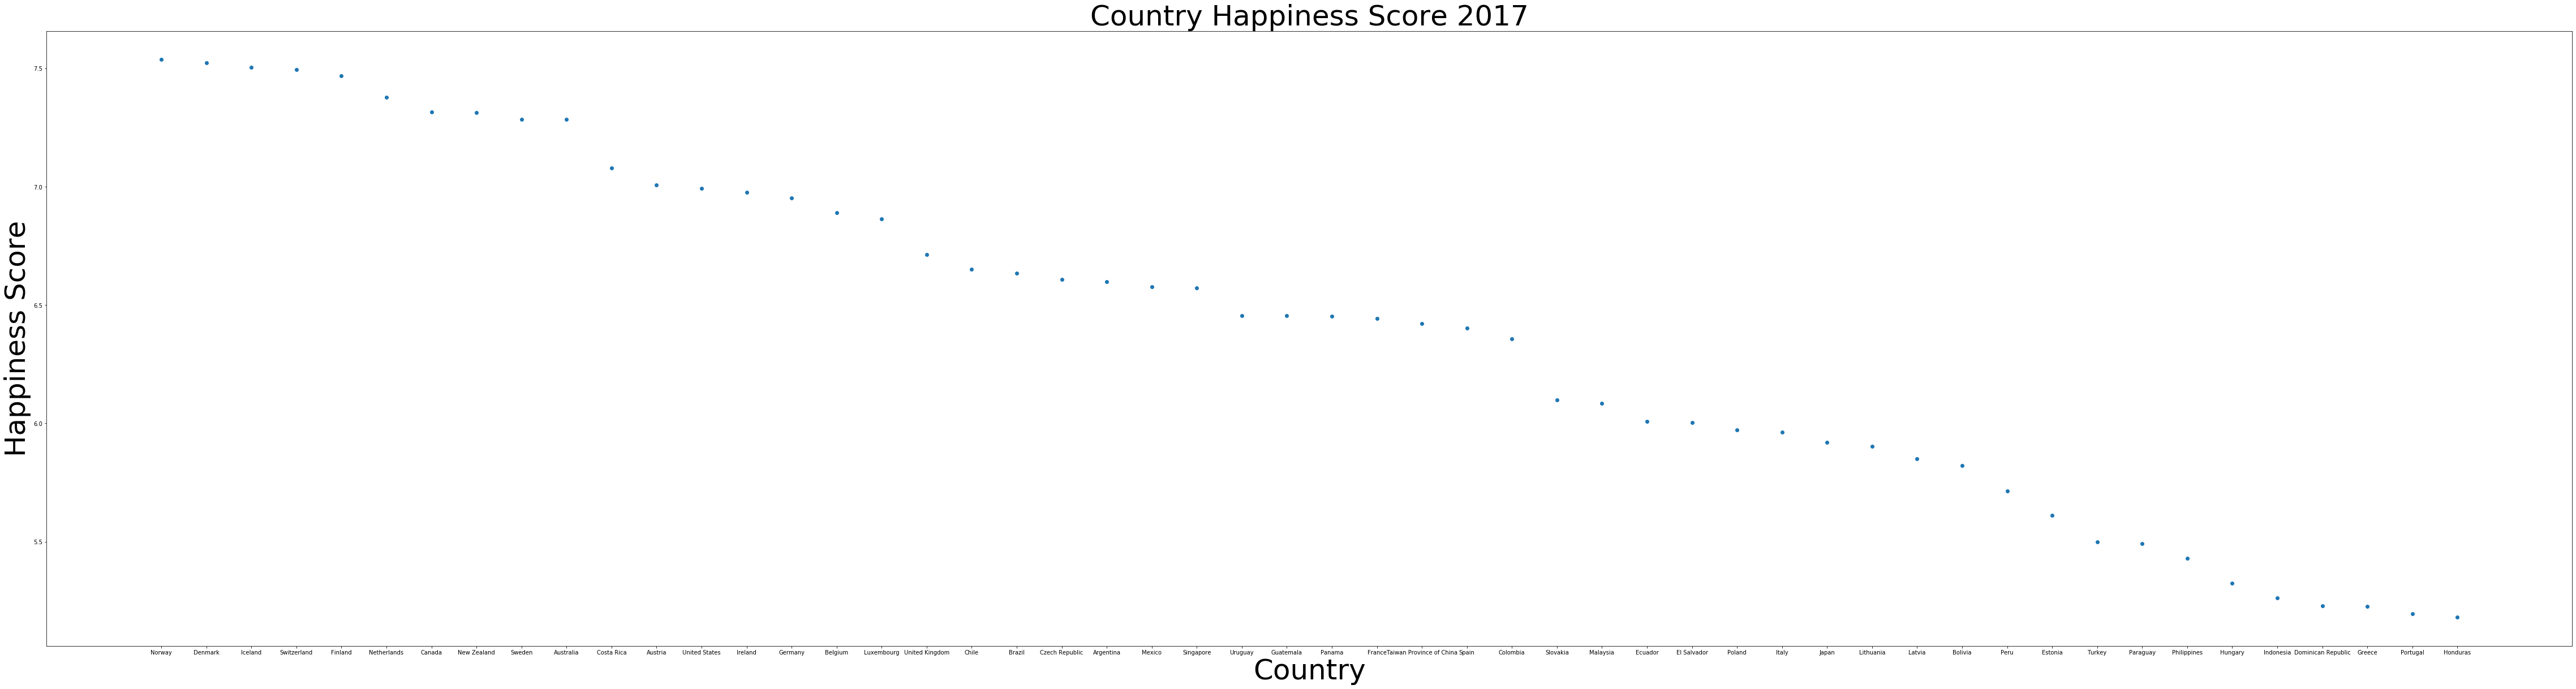

In [26]:
plt.figure(figsize=(80,20))

plt.scatter(happy['country'], happy['happiness_score'])
plt.xlabel('Country', fontsize=50)
plt.ylabel('Happiness Score', fontsize=50)
plt.title('Country Happiness Score 2017', fontsize=50)

Testing if the spotipy sp.audiofeatures() method works:

In [27]:
sp.audio_features('5aAx2yezTd8zXrkmtKl66Z')[0]

{'danceability': 0.681,
 'energy': 0.594,
 'key': 7,
 'loudness': -7.028,
 'mode': 1,
 'speechiness': 0.282,
 'acousticness': 0.165,
 'instrumentalness': 3.49e-06,
 'liveness': 0.134,
 'valence': 0.535,
 'tempo': 186.054,
 'type': 'audio_features',
 'id': '5aAx2yezTd8zXrkmtKl66Z',
 'uri': 'spotify:track:5aAx2yezTd8zXrkmtKl66Z',
 'track_href': 'https://api.spotify.com/v1/tracks/5aAx2yezTd8zXrkmtKl66Z',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5aAx2yezTd8zXrkmtKl66Z',
 'duration_ms': 230453,
 'time_signature': 4}

The code below is all of our previous attempts to write a method that we could use to call sp.audio_features() on the tracks in each country's dataframe. While it looks very messy, we are keeping it in case we can use any of it to find a more effective method than the one we came up with for this phase. 

We are now creating a method that will enable us to call the sp.audiofeatures() method. After some trial and error, in which we attempted to call use the Spotify API method on every URL on every song, in every row of the dataframe of each country, we realized that our method could never finish executing because the dataframes were so large and also that the Spotify API does have a limit on how many times you call their methods (we weren't allowed to use the Spotify API methods for a certain amount of time).

We developed getunique() to first find all of the unique songs in each dataframe. We realized that for the top daily songs for a year, there is obviously a lot of repititon of songs. So using pd.unique() enabled us to find a way to reduce the amount of times we needed to call sp.audio_features(). This method returns a dataframe that is a collection of the audio features information for every unique song in each country's dataframe. 

In [28]:
#These are the top 10 and bottom 10 happiest countries
topbot=pd.DataFrame()
topbot=pd.concat([topbot, happy.head(10)])
topbot=pd.concat([topbot, happy.tail(10)])
topbot=topbot.reset_index(drop=True)
topbot

,country,happiness_rank,happiness_score
0,Norway,1.0,7.537
1,Denmark,2.0,7.522
2,Iceland,3.0,7.504
3,Switzerland,4.0,7.494
4,Finland,5.0,7.469
5,Netherlands,6.0,7.377
6,Canada,7.0,7.316
7,New Zealand,8.0,7.314
8,Sweden,9.0,7.284
9,Australia,10.0,7.284


In [29]:
main.groupby('region').groups

{'ar': Int64Index([365916, 365917, 365918, 365919, 365920, 365921, 365922, 365923,
             365924, 365925,
             ...
             383998, 383999, 384000, 384001, 384002, 384003, 384004, 384005,
             384006, 384007],
            dtype='int64', length=18092),
 'at': Int64Index([199012, 199013, 199014, 199015, 199016, 199017, 199018, 199019,
             199020, 199021,
             ...
             217097, 217098, 217099, 217100, 217101, 217102, 217103, 217104,
             217105, 217106],
            dtype='int64', length=18095),
 'au': Int64Index([162831, 162832, 162833, 162834, 162835, 162836, 162837, 162838,
             162839, 162840,
             ...
             180913, 180914, 180915, 180916, 180917, 180918, 180919, 180920,
             180921, 180922],
            dtype='int64', length=18092),
 'be': Int64Index([271389, 271390, 271391, 271392, 271393, 271394, 271395, 271396,
             271397, 271398,
             ...
             289471, 289472, 289473, 

In [30]:
names=main.region.unique()
new=names[:10]
new2=(names[len(names)-10:len(names)])
finalnames=np.append(new,new2).tolist()

finalsongs=main.loc[main['region'].isin(finalnames)]
finalsongs=finalsongs.reset_index(drop=True)
finalsongs

,unnamed:_0,position,track_name,artist,streams,url,date,region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no
...,...,...,...,...,...,...,...,...
355709,1294905,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn
355710,1294906,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn
355711,1294907,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn
355712,1294908,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn


In [31]:
finalsongs['country']=finalsongs['region']
finalsongs

,unnamed:_0,position,track_name,artist,streams,url,date,region,country
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no,no
...,...,...,...,...,...,...,...,...,...
355709,1294905,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn,hn
355710,1294906,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn,hn
355711,1294907,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn,hn
355712,1294908,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn,hn


In [32]:
region_dict={'no':"Norway", 'dk':"Denmark", 'ch':"Switzerland", 'fi':"Finland", 'nl':"Netherlands", 'se':"Sweden", 'ee':"Estonia", 'hu':"Hungary", 'id':"Indonesia", 'is':"Iceland", 'ca':"Canada",
       'nz':"New Zealand", 'au':"Australia", 'tr':"Turkey", 'py':"Paraguay", 'ph':"Philippines", 'do':"Dominican Republic", 'gy':"Greece", 'pt':"Portugal", 'hn':"Honduras"}

In [33]:
finalsongs.country=finalsongs['country'].map(region_dict)

In [34]:
finalsongs

,unnamed:_0,position,track_name,artist,streams,url,date,region,country
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no,Norway
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no,Norway
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no,Norway
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no,Norway
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no,Norway
...,...,...,...,...,...,...,...,...,...
355709,1294905,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn,Honduras
355710,1294906,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn,Honduras
355711,1294907,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn,Honduras
355712,1294908,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn,Honduras


In [35]:
spotify=topbot.merge(finalsongs, on="country")
spotify

,country,happiness_rank,happiness_score,unnamed:_0,position,track_name,artist,streams,url,date,region
0,Norway,1.0,7.537,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,Norway,1.0,7.537,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,Norway,1.0,7.537,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,Norway,1.0,7.537,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,Norway,1.0,7.537,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no
...,...,...,...,...,...,...,...,...,...,...,...
337632,Honduras,91.0,5.181,1294905,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn
337633,Honduras,91.0,5.181,1294906,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn
337634,Honduras,91.0,5.181,1294907,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn
337635,Honduras,91.0,5.181,1294908,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn


In [36]:
spotify.groupby('region').count()

,country,happiness_rank,happiness_score,unnamed:_0,position,track_name,artist,streams,url,date
region,,,,,,,,,,
au,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092
ca,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092
ch,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092
dk,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096
do,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091
ee,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976
fi,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096
hn,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089
hu,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093


In [37]:
def getunique(dataframe):
    audiofeatures=pd.DataFrame({'danceability':[], 'energy':[],'key':[], 'loudness':[], 'mode':[], 'speechiness':[],'acousticness':[], 'instrumentalness':[],'liveness':[], 'valence':[], 'tempo':[], 'type':[],'id':[], 'uri':[],'track_href':[], 'analysis_url':[], 'duration_ms':[], 'time_signature':[]})
    dataframe.drop_duplicates(subset ="track_name",
                     keep = 'first', inplace = True,)
    dataframe=dataframe.reset_index(drop=True)
#     dataframe['track_name']
#     uniquesongs=pd.unique(dataframe['track_name'])
#     list=[]
        
    for row in range(len(dataframe)):
#          for song in uniquesongs:
#             if dataframe.loc[row,'track_name']==song and not song in list:
            url=dataframe.loc[row,'url']
            sub=url.rindex('/')
            idurl=url[sub+1:]
            newrow=sp.audio_features(idurl)[0]
            audiofeatures=audiofeatures.append(newrow,ignore_index=True)
#             list.append(song)
    audiofeatures['track_name']=dataframe['track_name']
    audiofeatures['happiness_score']=dataframe['happiness_score']
    audiofeatures['happiness_rank']=dataframe['happiness_rank']
    audiofeatures['country']=dataframe['country']
    return audiofeatures

In [38]:
uniquespotify=getunique(spotify.copy())

In [39]:
uniquespotify

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,happiness_score,happiness_rank,country
0,0.676,0.929,10.0,-3.194,1.0,0.0458,0.1860,0.000405,0.1210,0.1570,...,0JiVRyTJcJnmlwCZ854K4p,spotify:track:0JiVRyTJcJnmlwCZ854K4p,https://api.spotify.com/v1/tracks/0JiVRyTJcJnm...,https://api.spotify.com/v1/audio-analysis/0JiV...,161200.0,4.0,Alone,7.537,1.0,Norway
1,0.720,0.763,9.0,-4.068,0.0,0.0523,0.4060,0.000000,0.1800,0.7420,...,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088.0,4.0,Rockabye (feat. Sean Paul & Anne-Marie),7.537,1.0,Norway
2,0.735,0.451,0.0,-8.374,1.0,0.0585,0.0631,0.000013,0.3250,0.0862,...,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,https://api.spotify.com/v1/audio-analysis/3NdD...,245200.0,4.0,I Don’t Wanna Live Forever (Fifty Shades Darke...,7.537,1.0,Norway
3,0.670,0.838,0.0,-4.031,1.0,0.0362,0.0604,0.000611,0.1590,0.7170,...,78rIJddV4X0HkNAInEcYde,spotify:track:78rIJddV4X0HkNAInEcYde,https://api.spotify.com/v1/tracks/78rIJddV4X0H...,https://api.spotify.com/v1/audio-analysis/78rI...,222041.0,4.0,Call On Me - Ryan Riback Extended Remix,7.537,1.0,Norway
4,0.773,0.819,0.0,-5.946,0.0,0.1180,0.4260,0.000000,0.0679,0.5850,...,5GXAXm5YOmYT0kL5jHvYBt,spotify:track:5GXAXm5YOmYT0kL5jHvYBt,https://api.spotify.com/v1/tracks/5GXAXm5YOmYT...,https://api.spotify.com/v1/audio-analysis/5GXA...,269187.0,4.0,I Feel It Coming,7.537,1.0,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,0.663,0.519,8.0,-9.324,0.0,0.3070,0.6250,0.000000,0.1170,0.4390,...,3hfpB94cfVvdLAnm8TUBAv,spotify:track:3hfpB94cfVvdLAnm8TUBAv,https://api.spotify.com/v1/tracks/3hfpB94cfVvd...,https://api.spotify.com/v1/audio-analysis/3hfp...,227540.0,4.0,Ahora Se,5.181,91.0,Honduras
2450,0.765,0.339,8.0,-8.965,1.0,0.0365,0.2780,0.000000,0.1310,0.8640,...,1l77YWrGUp3qX3NS1rz7lq,spotify:track:1l77YWrGUp3qX3NS1rz7lq,https://api.spotify.com/v1/tracks/1l77YWrGUp3q...,https://api.spotify.com/v1/audio-analysis/1l77...,202560.0,4.0,El Color de Tus Ojos,5.181,91.0,Honduras
2451,0.563,0.877,1.0,-2.082,0.0,0.1200,0.0293,0.000000,0.0749,0.6460,...,6f4UPdDBQONKJBRqwZGjaJ,spotify:track:6f4UPdDBQONKJBRqwZGjaJ,https://api.spotify.com/v1/tracks/6f4UPdDBQONK...,https://api.spotify.com/v1/audio-analysis/6f4U...,209033.0,4.0,Cásate Conmigo,5.181,91.0,Honduras
2452,0.748,0.532,2.0,-7.157,1.0,0.1320,0.3890,0.000000,0.0600,0.3690,...,3l7mBXrUfRwa4VO8nHLAgJ,spotify:track:3l7mBXrUfRwa4VO8nHLAgJ,https://api.spotify.com/v1/tracks/3l7mBXrUfRwa...,https://api.spotify.com/v1/audio-analysis/3l7m...,245987.0,4.0,Solo - Remix,5.181,91.0,Honduras


In [40]:
save=uniquespotify.copy()
uniquespotify=uniquespotify.drop(['analysis_url','time_signature','track_href','uri','type'],axis=1)

In [41]:
uniquespotify

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,track_name,happiness_score,happiness_rank,country
0,0.676,0.929,10.0,-3.194,1.0,0.0458,0.1860,0.000405,0.1210,0.1570,97.019,0JiVRyTJcJnmlwCZ854K4p,161200.0,Alone,7.537,1.0,Norway
1,0.720,0.763,9.0,-4.068,0.0,0.0523,0.4060,0.000000,0.1800,0.7420,101.965,5knuzwU65gJK7IF5yJsuaW,251088.0,Rockabye (feat. Sean Paul & Anne-Marie),7.537,1.0,Norway
2,0.735,0.451,0.0,-8.374,1.0,0.0585,0.0631,0.000013,0.3250,0.0862,117.973,3NdDpSvN911VPGivFlV5d0,245200.0,I Don’t Wanna Live Forever (Fifty Shades Darke...,7.537,1.0,Norway
3,0.670,0.838,0.0,-4.031,1.0,0.0362,0.0604,0.000611,0.1590,0.7170,104.998,78rIJddV4X0HkNAInEcYde,222041.0,Call On Me - Ryan Riback Extended Remix,7.537,1.0,Norway
4,0.773,0.819,0.0,-5.946,0.0,0.1180,0.4260,0.000000,0.0679,0.5850,92.990,5GXAXm5YOmYT0kL5jHvYBt,269187.0,I Feel It Coming,7.537,1.0,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,0.663,0.519,8.0,-9.324,0.0,0.3070,0.6250,0.000000,0.1170,0.4390,123.844,3hfpB94cfVvdLAnm8TUBAv,227540.0,Ahora Se,5.181,91.0,Honduras
2450,0.765,0.339,8.0,-8.965,1.0,0.0365,0.2780,0.000000,0.1310,0.8640,123.950,1l77YWrGUp3qX3NS1rz7lq,202560.0,El Color de Tus Ojos,5.181,91.0,Honduras
2451,0.563,0.877,1.0,-2.082,0.0,0.1200,0.0293,0.000000,0.0749,0.6460,93.832,6f4UPdDBQONKJBRqwZGjaJ,209033.0,Cásate Conmigo,5.181,91.0,Honduras
2452,0.748,0.532,2.0,-7.157,1.0,0.1320,0.3890,0.000000,0.0600,0.3690,98.038,3l7mBXrUfRwa4VO8nHLAgJ,245987.0,Solo - Remix,5.181,91.0,Honduras


In [42]:
uniquespotify.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'track_name', 'happiness_score', 'happiness_rank',
       'country'],
      dtype='object')

In [43]:
finalsongs.columns

Index(['unnamed:_0', 'position', 'track_name', 'artist', 'streams', 'url',
       'date', 'region', 'country'],
      dtype='object')

In [44]:
uniquespotify=uniquespotify[['country', 'happiness_score', 'happiness_rank','track_name', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms']]

In [45]:
uniquespotify

,country,happiness_score,happiness_rank,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Norway,7.537,1.0,Alone,0.676,0.929,10.0,-3.194,1.0,0.0458,0.1860,0.000405,0.1210,0.1570,97.019,0JiVRyTJcJnmlwCZ854K4p,161200.0
1,Norway,7.537,1.0,Rockabye (feat. Sean Paul & Anne-Marie),0.720,0.763,9.0,-4.068,0.0,0.0523,0.4060,0.000000,0.1800,0.7420,101.965,5knuzwU65gJK7IF5yJsuaW,251088.0
2,Norway,7.537,1.0,I Don’t Wanna Live Forever (Fifty Shades Darke...,0.735,0.451,0.0,-8.374,1.0,0.0585,0.0631,0.000013,0.3250,0.0862,117.973,3NdDpSvN911VPGivFlV5d0,245200.0
3,Norway,7.537,1.0,Call On Me - Ryan Riback Extended Remix,0.670,0.838,0.0,-4.031,1.0,0.0362,0.0604,0.000611,0.1590,0.7170,104.998,78rIJddV4X0HkNAInEcYde,222041.0
4,Norway,7.537,1.0,I Feel It Coming,0.773,0.819,0.0,-5.946,0.0,0.1180,0.4260,0.000000,0.0679,0.5850,92.990,5GXAXm5YOmYT0kL5jHvYBt,269187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,Honduras,5.181,91.0,Ahora Se,0.663,0.519,8.0,-9.324,0.0,0.3070,0.6250,0.000000,0.1170,0.4390,123.844,3hfpB94cfVvdLAnm8TUBAv,227540.0
2450,Honduras,5.181,91.0,El Color de Tus Ojos,0.765,0.339,8.0,-8.965,1.0,0.0365,0.2780,0.000000,0.1310,0.8640,123.950,1l77YWrGUp3qX3NS1rz7lq,202560.0
2451,Honduras,5.181,91.0,Cásate Conmigo,0.563,0.877,1.0,-2.082,0.0,0.1200,0.0293,0.000000,0.0749,0.6460,93.832,6f4UPdDBQONKJBRqwZGjaJ,209033.0
2452,Honduras,5.181,91.0,Solo - Remix,0.748,0.532,2.0,-7.157,1.0,0.1320,0.3890,0.000000,0.0600,0.3690,98.038,3l7mBXrUfRwa4VO8nHLAgJ,245987.0


In [46]:
save2=uniquespotify.copy()

In [47]:
finalsongs

,unnamed:_0,position,track_name,artist,streams,url,date,region,country
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no,Norway
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no,Norway
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no,Norway
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no,Norway
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no,Norway
...,...,...,...,...,...,...,...,...,...
355709,1294905,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn,Honduras
355710,1294906,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn,Honduras
355711,1294907,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn,Honduras
355712,1294908,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn,Honduras


In [48]:
finalsongs
        
        

,unnamed:_0,position,track_name,artist,streams,url,date,region,country
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no,Norway
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no,Norway
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no,Norway
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no,Norway
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no,Norway
...,...,...,...,...,...,...,...,...,...
355709,1294905,46,Ahora Me Llama,Karol G,2031,https://open.spotify.com/track/11ZRYISCsAsLyyJ...,2017-12-31,hn,Honduras
355710,1294906,47,Too Good At Goodbyes,Sam Smith,1979,https://open.spotify.com/track/1mXVgsBdtIVeCLJ...,2017-12-31,hn,Honduras
355711,1294907,48,Krippy Kush,Farruko,1964,https://open.spotify.com/track/7FfpP3YZ6fOWMdx...,2017-12-31,hn,Honduras
355712,1294908,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,https://open.spotify.com/track/3iGjLTDqokSuf6y...,2017-12-31,hn,Honduras


In [49]:
finalsongs=finalsongs.merge(uniquespotify[['danceability','track_name' ,'happiness_score', 'happiness_rank', 'energy', 'key', 'loudness', 'mode', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'duration_ms']], how="left",on='track_name')

In [50]:
finalsongs.rename({"unnamed:_0":"a"}, axis="columns", inplace=True)

In [51]:
finalsongs.drop('a',axis=1,inplace=True)

In [52]:
finalsongs.columns

Index(['position', 'track_name', 'artist', 'streams', 'url', 'date', 'region',
       'country', 'danceability', 'happiness_score', 'happiness_rank',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'duration_ms'],
      dtype='object')

In [53]:
finalsongs=finalsongs[['country','happiness_score', 'happiness_rank','date','position', 'track_name', 'artist', 'streams', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'id','duration_ms']]

In [54]:
finalsongs

,country,happiness_score,happiness_rank,date,position,track_name,artist,streams,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Norway,7.537,1.0,2017-01-01,1,Alone,Alan Walker,103886,0.676,0.929,...,-3.194,1.0,0.0458,0.1860,0.000405,0.1210,0.1570,97.019,0JiVRyTJcJnmlwCZ854K4p,161200.0
1,Norway,7.537,1.0,2017-01-01,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,0.720,0.763,...,-4.068,0.0,0.0523,0.4060,0.000000,0.1800,0.7420,101.965,5knuzwU65gJK7IF5yJsuaW,251088.0
2,Norway,7.537,1.0,2017-01-01,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,0.735,0.451,...,-8.374,1.0,0.0585,0.0631,0.000013,0.3250,0.0862,117.973,3NdDpSvN911VPGivFlV5d0,245200.0
3,Norway,7.537,1.0,2017-01-01,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,0.670,0.838,...,-4.031,1.0,0.0362,0.0604,0.000611,0.1590,0.7170,104.998,78rIJddV4X0HkNAInEcYde,222041.0
4,Norway,7.537,1.0,2017-01-01,5,I Feel It Coming,The Weeknd,56607,0.773,0.819,...,-5.946,0.0,0.1180,0.4260,0.000000,0.0679,0.5850,92.990,5GXAXm5YOmYT0kL5jHvYBt,269187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355709,Honduras,5.493,70.0,2017-12-31,46,Ahora Me Llama,Karol G,2031,0.664,0.576,...,-5.395,0.0,0.0349,0.0073,0.000063,0.0912,0.1210,134.934,61HHDBLqF3AmSvLfHKNGd2,233293.0
355710,Honduras,7.537,1.0,2017-12-31,47,Too Good At Goodbyes,Sam Smith,1979,0.515,0.378,...,-8.264,1.0,0.0650,0.6180,0.000000,0.1720,0.5360,91.883,7oAraczbemGSNWqnbkU87R,201000.0
355711,Honduras,5.493,70.0,2017-12-31,48,Krippy Kush,Farruko,1964,0.708,0.560,...,-7.132,1.0,0.1290,0.0668,0.000000,0.1110,0.4110,163.043,3rgjBiAMVGnxmsTDmUy8vb,230520.0
355712,Honduras,5.181,91.0,2017-12-31,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,0.686,0.857,...,-3.328,0.0,0.0891,0.4020,0.000000,0.4930,0.9010,124.037,3iGjLTDqokSuf6yYI83wzi,239372.0


In [55]:
finalsongs.dropna(inplace=True)

In [56]:
finalsongs

,country,happiness_score,happiness_rank,date,position,track_name,artist,streams,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Norway,7.537,1.0,2017-01-01,1,Alone,Alan Walker,103886,0.676,0.929,...,-3.194,1.0,0.0458,0.1860,0.000405,0.1210,0.1570,97.019,0JiVRyTJcJnmlwCZ854K4p,161200.0
1,Norway,7.537,1.0,2017-01-01,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,0.720,0.763,...,-4.068,0.0,0.0523,0.4060,0.000000,0.1800,0.7420,101.965,5knuzwU65gJK7IF5yJsuaW,251088.0
2,Norway,7.537,1.0,2017-01-01,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,0.735,0.451,...,-8.374,1.0,0.0585,0.0631,0.000013,0.3250,0.0862,117.973,3NdDpSvN911VPGivFlV5d0,245200.0
3,Norway,7.537,1.0,2017-01-01,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,0.670,0.838,...,-4.031,1.0,0.0362,0.0604,0.000611,0.1590,0.7170,104.998,78rIJddV4X0HkNAInEcYde,222041.0
4,Norway,7.537,1.0,2017-01-01,5,I Feel It Coming,The Weeknd,56607,0.773,0.819,...,-5.946,0.0,0.1180,0.4260,0.000000,0.0679,0.5850,92.990,5GXAXm5YOmYT0kL5jHvYBt,269187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355709,Honduras,5.493,70.0,2017-12-31,46,Ahora Me Llama,Karol G,2031,0.664,0.576,...,-5.395,0.0,0.0349,0.0073,0.000063,0.0912,0.1210,134.934,61HHDBLqF3AmSvLfHKNGd2,233293.0
355710,Honduras,7.537,1.0,2017-12-31,47,Too Good At Goodbyes,Sam Smith,1979,0.515,0.378,...,-8.264,1.0,0.0650,0.6180,0.000000,0.1720,0.5360,91.883,7oAraczbemGSNWqnbkU87R,201000.0
355711,Honduras,5.493,70.0,2017-12-31,48,Krippy Kush,Farruko,1964,0.708,0.560,...,-7.132,1.0,0.1290,0.0668,0.000000,0.1110,0.4110,163.043,3rgjBiAMVGnxmsTDmUy8vb,230520.0
355712,Honduras,5.181,91.0,2017-12-31,49,Me Emborrachare - Bachata Radio Edit,Grupo Extra,1959,0.686,0.857,...,-3.328,0.0,0.0891,0.4020,0.000000,0.4930,0.9010,124.037,3iGjLTDqokSuf6yYI83wzi,239372.0


In [66]:
finalsongs.groupby('country').count()

,happiness_score,happiness_rank,date,position,track_name,artist,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
country,,,,,,,,,,,,,,,,,,,,
Australia,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092
Canada,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092,18092
Denmark,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096
Dominican Republic,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091,18091
Estonia,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976,11976
Finland,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096,18096
Honduras,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089,18089
Hungary,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093,18093
Iceland,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080,18080


In [71]:
topfinal=pd.DataFrame()
split=finalsongs[finalsongs['country']=='Estonia'].index[0]
topfinal=finalsongs[:split]
botfinal=finalsongs[split:]

In [76]:
# rolling=pd.DataFrame()
topfinalrolling = topfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
# rolling['avg_danceability']=finalsongs['danceability'].rolling(14).mean()
topfinalrolling=topfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')


In [78]:
rolling2=topfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()

In [79]:
topfinalrolling['valence']=rolling2['valence']

In [80]:
rolling2['danceability']=topfinalrolling['danceability']

In [82]:
topfinalrolling

,country,level_1,danceability,happiness_score,valence
0,Norway,0,NaN,7.537,NaN
1,Norway,1,NaN,7.537,NaN
2,Norway,2,NaN,7.537,NaN
3,Norway,3,NaN,7.537,NaN
4,Norway,4,NaN,7.537,NaN
...,...,...,...,...,...
180918,Australia,180918,0.672786,7.284,0.517193
180919,Australia,180919,0.648143,7.284,0.471764
180920,Australia,180920,0.646571,7.284,0.508264
180921,Australia,180921,0.651071,7.284,0.539550


In [84]:
botfinalrolling=botfinal.groupby('country', sort=False)[['danceability']].rolling(window=14).mean().reset_index()
# rolling['avg_danceability']=finalsongs['danceability'].rolling(14).mean()
botfinalrolling=botfinalrolling.merge(topbot[['country','happiness_score']], how='left',on='country')


In [85]:
rolling3=botfinal.groupby('country', sort=False)[['valence']].rolling(window=14).mean().reset_index()

In [86]:
botfinalrolling['valence']=rolling3['valence']

In [87]:
rolling3['danceability']=botfinalrolling['danceability']

In [88]:
botfinalrolling

,country,level_1,danceability,happiness_score,valence
0,Estonia,180923,NaN,5.611,NaN
1,Estonia,180924,NaN,5.611,NaN
2,Estonia,180925,NaN,5.611,NaN
3,Estonia,180926,NaN,5.611,NaN
4,Estonia,180927,NaN,5.611,NaN
...,...,...,...,...,...
156709,Honduras,355709,0.760143,5.181,0.529857
156710,Honduras,355710,0.743286,5.181,0.543214
156711,Honduras,355711,0.734929,5.181,0.506071
156712,Honduras,355712,0.741143,5.181,0.558429


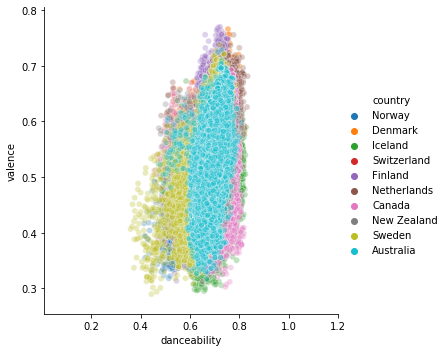

<Figure size 7200x3240 with 0 Axes>

In [96]:

scatter=sns.relplot(x='danceability', y='valence', hue='country', data=topfinalrolling, alpha=0.3)

plt.tight_layout
# x_ticks = np.arange(0, .01, 8)
# plt.xticks(x_ticks)
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.01,1.2))
plt.show()

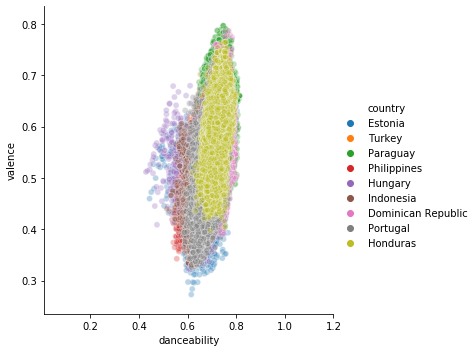

<Figure size 7200x3240 with 0 Axes>

In [97]:
scatter=sns.relplot(x='danceability', y='valence', hue='country', data=botfinalrolling, alpha=0.3)

plt.tight_layout
# x_ticks = np.arange(0, .01, 8)
# plt.xticks(x_ticks)
plt.figure(figsize = (100, 45))
scatter.set(xlim=(.01,1.2))
plt.show()

Testing if the getunique() method worked and using .describe() to get same basic statistics.

Now we are looping through all of the country dataframes, calling .describe() on them (to make retrieving information about the audio feature averages a little easier). We will then add this information back into the happy dataframe.

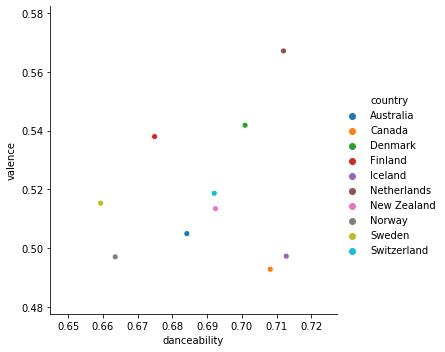

In [106]:
topavg=topfinal.groupby('country').mean()
botavg=botfinal.groupby('country').mean()
topavg
scatter=sns.relplot(x='danceability', y='valence', hue=topavg.index, data=topavg)


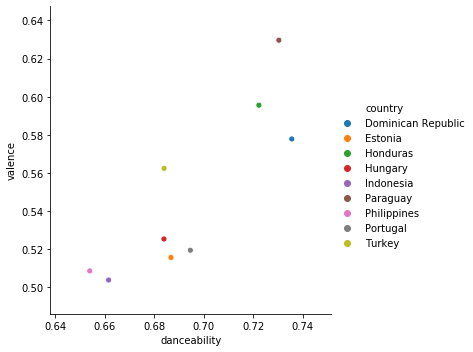

In [107]:
scatter=sns.relplot(x='danceability', y='valence', hue=botavg.index, data=botavg)

Now we are printing the original happy dataframe but with the average spotify audio feature score for their top daily songs in its own column. This will be useful for any computations or graphic we try and make later in the project.

In [111]:
botavg.corr()

,happiness_score,happiness_rank,position,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
happiness_score,1.000000,-0.999609,-0.411601,0.234952,-0.778025,-0.753863,0.581166,-0.668025,0.230398,-0.383073,-0.287546,0.324160,-0.948166,-0.908314,-0.882693,-0.895836
happiness_rank,-0.999609,1.000000,0.413366,-0.241192,0.785712,0.752074,-0.587068,0.670834,-0.226429,0.390455,0.291857,-0.339291,0.949972,0.902904,0.893950,0.904206
position,-0.411601,0.413366,1.000000,0.242179,0.105852,0.139581,0.123390,0.171988,-0.082624,-0.087016,0.430429,-0.268459,0.261939,0.280268,0.384498,0.324895
streams,0.234952,-0.241192,0.242179,1.000000,-0.712099,-0.762472,-0.104442,-0.637424,0.595999,-0.783752,0.744034,0.077009,-0.492933,-0.461844,-0.398402,-0.207011
danceability,-0.778025,0.785712,0.105852,-0.712099,1.000000,0.904917,-0.407745,0.846525,-0.369686,0.751176,-0.241906,-0.462549,0.909744,0.854972,0.831103,0.739777
energy,-0.753863,0.752074,0.139581,-0.762472,0.904917,1.000000,-0.222786,0.884474,-0.503078,0.665693,-0.393227,-0.242350,0.877483,0.918910,0.718492,0.578583
key,0.581166,-0.587068,0.123390,-0.104442,-0.407745,-0.222786,1.000000,-0.373962,-0.434198,0.049173,-0.489421,0.479741,-0.493299,-0.390672,-0.606125,-0.588422
loudness,-0.668025,0.670834,0.171988,-0.637424,0.846525,0.884474,-0.373962,1.000000,-0.079654,0.389962,-0.297363,-0.617732,0.756037,0.820318,0.743625,0.532828
mode,0.230398,-0.226429,-0.082624,0.595999,-0.369686,-0.503078,-0.434198,-0.079654,1.000000,-0.779641,0.449320,-0.543951,-0.376559,-0.345758,-0.133261,-0.122862
speechiness,-0.383073,0.390455,-0.087016,-0.783752,0.751176,0.665693,0.049173,0.389962,-0.779641,1.000000,-0.484154,0.036306,0.588233,0.505142,0.417662,0.375337


In [112]:
topavg.corr()

,happiness_score,happiness_rank,position,streams,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
happiness_score,1.000000,-0.906042,-0.153632,-0.637656,0.031508,-0.501454,0.203384,-0.372613,0.027047,-0.122345,0.053163,0.207842,-0.404217,-0.526375,0.272920,0.351066
happiness_rank,-0.906042,1.000000,0.083338,0.373796,-0.043302,0.573895,-0.116552,0.354909,-0.308002,0.048025,-0.271914,-0.282115,0.708195,0.530354,0.085374,-0.337539
position,-0.153632,0.083338,1.000000,0.482353,-0.381274,0.596174,0.128985,0.851681,0.197067,-0.570427,-0.156764,0.152263,0.076206,0.337969,-0.399770,-0.202219
streams,-0.637656,0.373796,0.482353,1.000000,-0.237675,0.295040,-0.204928,0.378019,0.434273,-0.111836,0.139047,0.188557,-0.021631,0.143968,-0.507159,-0.242539
danceability,0.031508,-0.043302,-0.381274,-0.237675,1.000000,-0.458192,0.200564,-0.407449,-0.264173,0.839906,0.350216,-0.175166,-0.330373,0.196563,-0.052583,0.416156
energy,-0.501454,0.573895,0.596174,0.295040,-0.458192,1.000000,0.102368,0.886977,-0.186000,-0.449291,-0.339282,-0.094747,0.536182,0.668069,-0.034424,-0.703312
key,0.203384,-0.116552,0.128985,-0.204928,0.200564,0.102368,1.000000,0.128848,-0.586632,-0.032230,0.319921,-0.286807,-0.112294,0.279816,0.226077,-0.303530
loudness,-0.372613,0.354909,0.851681,0.378019,-0.407449,0.886977,0.128848,1.000000,0.034408,-0.547139,-0.273699,0.097783,0.235396,0.614155,-0.358819,-0.459976
mode,0.027047,-0.308002,0.197067,0.434273,-0.264173,-0.186000,-0.586632,0.034408,1.000000,-0.037088,-0.234432,0.741720,-0.417906,-0.515213,-0.552146,0.384937
speechiness,-0.122345,0.048025,-0.570427,-0.111836,0.839906,-0.449291,-0.032230,-0.547139,-0.037088,1.000000,0.221901,-0.121039,-0.215595,0.006862,0.044837,0.300170


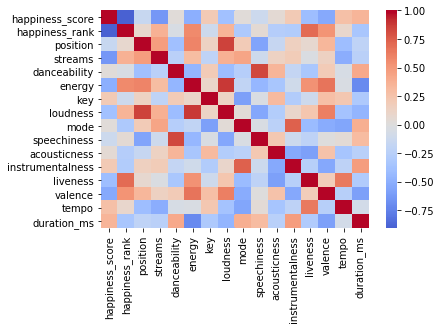

In [115]:
sns.heatmap(topavg.corr(), center=0, cmap='coolwarm')

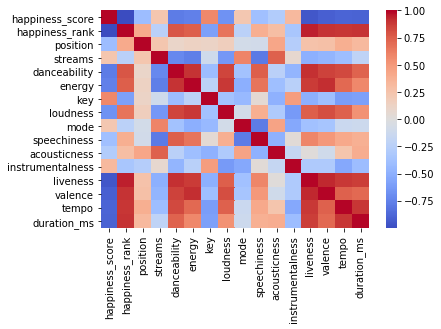

In [116]:
sns.heatmap(botavg.corr(), center=0, cmap='coolwarm')

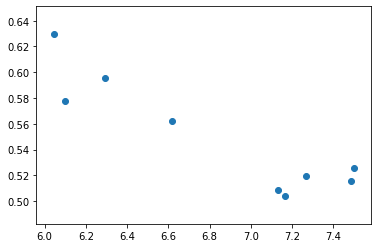

In [121]:
plt.scatter(botavg['happiness_score'],botavg['valence'])

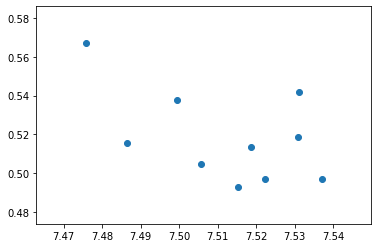

In [122]:
plt.scatter(topavg['happiness_score'],topavg['valence'])

<Figure size 7200x3240 with 0 Axes>

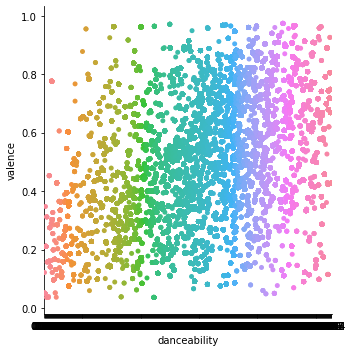

<Figure size 7200x3240 with 0 Axes>

In [129]:
sns.catplot(x='danceability',y='valence', data= topfinal)
plt.figure(figsize = (100, 45))

In [ ]:
covar

In [ ]:
# fig,ax = plt.subplots(figsize=(80,20))
# ax.plot(happy['country'], happy['happiness_score'], color="red", marker="o")
# ax.set_xlabel("country",fontsize=50)
# ax.set_ylabel("Happiness Score",color="red",fontsize=50)
# ax2=ax.twinx()
# ax2.plot(happy['country'], happy['avg_danceability'] ,color="blue",marker="o")
# ax2.set_ylabel("Average Danceability",color="blue",fontsize=50)
# plt.title('Happiness Score and Danceability of Top Songs', fontsize=50)
# plt.show()

In [ ]:
# fig,ax = plt.subplots(figsize=(80,20))
# ax.plot(happy['country'], happy['happiness_score'], color="red", marker="o")
# ax.set_xlabel("country",fontsize=50)
# ax.set_ylabel("Happiness Score",color="red",fontsize=50)
# ax2=ax.twinx()
# ax2.plot(happy['country'], happy['avg_energy'] ,color="green",marker="o")
# ax2.set_ylabel("Average Energy",color="green",fontsize=50)
# plt.title('Happiness Score and Energy of Top Songs', fontsize=50)
# plt.show()

In [ ]:
# fig,ax = plt.subplots(figsize=(80,20))
# ax.plot(happy['country'], happy['happiness_score'], color="red", marker="o")
# ax.set_xlabel("country",fontsize=50)
# ax.set_ylabel("Happiness Score",color="red",fontsize=50)
# ax2=ax.twinx()
# ax2.plot(happy['country'], happy['avg_loudness'] ,color="black",marker="o")
# ax2.set_ylabel("Average Loudness",color="black",fontsize=50)
# plt.title('Happiness Score and Loudness of Top Songs', fontsize=50)
# plt.show()

In [ ]:
# fig,ax = plt.subplots(figsize=(80,20))
# ax.plot(happy['country'], happy['happiness_score'], color="red", marker="o")
# ax.set_xlabel("country",fontsize=50)
# ax.set_ylabel("Happiness Score",color="red",fontsize=50)
# ax2=ax.twinx()
# ax2.plot(happy['country'], happy['avg_key'] ,color="pink",marker="o")
# ax2.set_ylabel("Average Key",color="pink",fontsize=50)
# plt.title('Happiness Score and Key of Top Songs', fontsize=50)
# plt.show()

Just by looking at these graphs, there does not seem to be any clear relationship between the song features and the happinness score of a country.

# VII. Questions for reviewers

1. We think that we are using the spotify API correctly, however we can’t get it to work in the for-loop and went to multiple office hours trying to resolve this issue. Any suggestions would be appreciated! We decided to implement getunique() because we thought that this would make the program more efficient, but we still aren't sure if this is the best approach.

2. When comparing country to country, we're pretty concerned about sampling and random sampling, social events can happen on certain days and affect moods for different countries. How should we go about comparing days in countries?

3. For loop issues in data cleaning (procedures we could call on dataframes in a for loop instead of calling it individually on every country). We're not really sure why it's not working

4. What graphs/visualizations would you recommend for us to use?

5. In the first_fifty method, you can see that not all countries have the same length of songs. How would we then be able to accurately get the top 50 of every song?